In [1]:
import os
import sys
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('path/to/src')

from src.other_algorithms.run_algorithm import run_algorithm, print_sequences
from src.TaSTSPM import tastsp_algorithm
from src.Sequence import Dataset, Sequence, Element

# Define parameters
dataset_path = '../data/crimes_Boston.csv'
R = 100.0
T = 8000
thetas = [round(x * 0.01, 2) for x in range(1, 11)]
sequence_lengths = [1, 2]
num_repeats = 10

# Load dataset for TaSTSP
print("Loading dataset for TaSTSP...")
dataset_tastsp = Dataset(dataset_path)
F = list(dataset_tastsp.dataset_dict.keys())
print("Dataset loaded.")

# Function to generate random sequences
def generate_random_sequences(event_types, num_sequences):
    sequences = []
    for _ in range(num_sequences):
        random_event = random.choice(event_types)
        sequence = Sequence([Element(random_event)])
        sequences.append(sequence)
    return sequences

# Initialize results storage
execution_times = {length: [] for length in sequence_lengths}
pattern_counts = {length: [] for length in sequence_lengths}
execution_times_std = {length: [] for length in sequence_lengths}  # To store standard deviation
cst_spminer_times = []
cst_spminer_patterns = []
stbfm_times = []
stbfm_patterns = []

# Perform experiments
for theta in thetas:
    # Run CST_SPMiner
    print("Running CST_SPMiner...")
    start_time = time.time()
    result_CST_SPMiner = run_algorithm(dataset_path, R, T, theta, 'CST_SPMiner', 2)
    cst_spminer_time = time.time() - start_time
    cst_spminer_pattern_count = sum(len(level) for level in result_CST_SPMiner)
    cst_spminer_times.append(cst_spminer_time)
    cst_spminer_patterns.append(cst_spminer_pattern_count)
    print("CST_SPMiner completed.")

    # Run STBFM
    print("Running STBFM...")
    start_time = time.time()
    result_STBFM = run_algorithm(dataset_path, R, T, theta, 'STBFM', 2)
    stbfm_time = time.time() - start_time
    stbfm_pattern_count = sum(len(level) for level in result_STBFM)
    stbfm_times.append(stbfm_time)
    stbfm_patterns.append(stbfm_pattern_count)
    print("STBFM completed.")

    for length in sequence_lengths:
        times = []
        patterns = []
        for re in range(num_repeats):
            print(f"Length: {length}, Theta: {theta}, Repeat: {re}")
            stq = generate_random_sequences(F, length)
            start_time = time.time()
            result_tastsp = tastsp_algorithm(dataset_tastsp, F, R, T, theta, stq)
            times.append(time.time() - start_time)
            patterns.append(len(result_tastsp))
        average_time = np.mean(times)
        std_dev_time = np.std(times)
        average_patterns = np.mean(patterns)
        execution_times[length].append(average_time)
        execution_times_std[length].append(std_dev_time)
        pattern_counts[length].append(average_patterns)
        print(f"Length: {length}, Theta: {theta}, Avg Time: {average_time}, Std Dev: {std_dev_time}, Avg Patterns: {average_patterns}")


Loading dataset for TaSTSP...
Loading data from ../data/crimes_Boston.csv
Data read successfully: 40544 rows
Dataset loaded.
Running CST_SPMiner...
Starting CST_SPMiner Algorithm
Created 1-length sequences
Created 2-length sequences
Created 3-length sequences
Created 4-length sequences
Created 5-length sequences
Created 6-length sequences
CST_SPMiner Algorithm Completed
CST_SPMiner completed.
Running STBFM...
Starting STBFM Algorithm
Created 1-length sequences
Created 2-length sequences
Created 3-length sequences
Created 4-length sequences
Created 5-length sequences
Created 6-length sequences
STBFM Algorithm Completed
STBFM completed.
Length: 1, Theta: 0.01, Repeat: 0
Length: 1, Theta: 0.01, Repeat: 1
Length: 1, Theta: 0.01, Repeat: 2
Length: 1, Theta: 0.01, Repeat: 3
Length: 1, Theta: 0.01, Repeat: 4
Length: 1, Theta: 0.01, Repeat: 5
Length: 1, Theta: 0.01, Repeat: 6
Length: 1, Theta: 0.01, Repeat: 7
Length: 1, Theta: 0.01, Repeat: 8
Length: 1, Theta: 0.01, Repeat: 9
Length: 1, Theta:

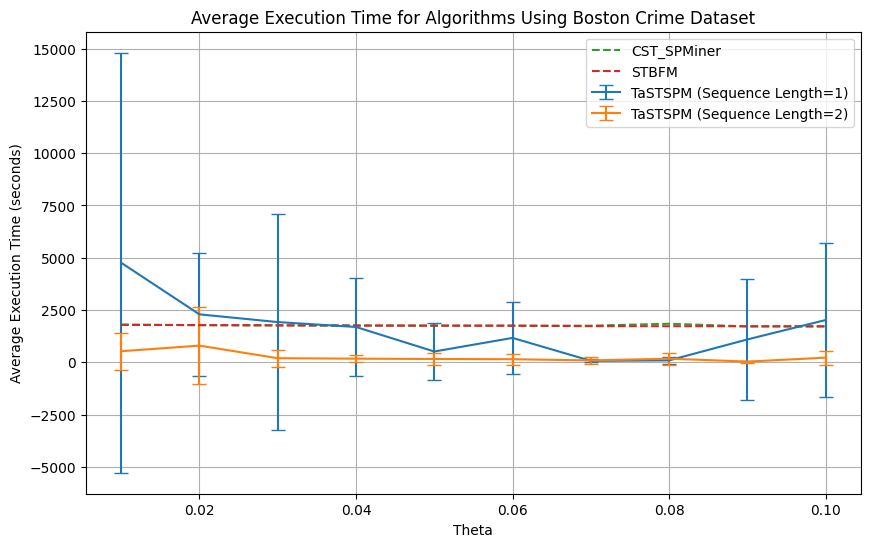

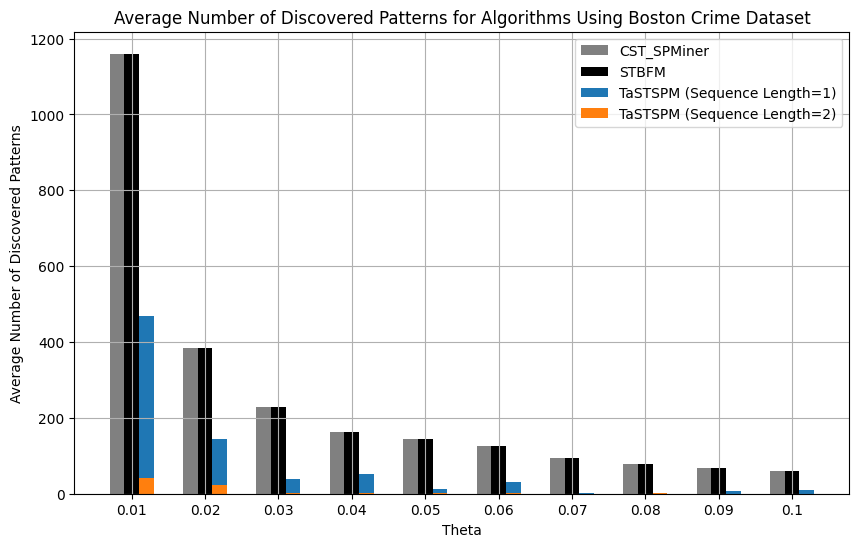

In [5]:
# Plot the execution times
plt.figure(figsize=(10, 6))
for length in sequence_lengths:
    plt.errorbar(thetas, execution_times[length], yerr=execution_times_std[length], label=f'TaSTSPM (Sequence Length={length})', capsize=5)
plt.plot(thetas, cst_spminer_times, label='CST_SPMiner', linestyle='--')
plt.plot(thetas, stbfm_times, label='STBFM', linestyle='--')
plt.xlabel('Theta')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Execution Time for Algorithms Using Boston Crime Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of discovered patterns
plt.figure(figsize=(10, 6))
width = 0.2  # width of the bars
x = np.arange(len(thetas))

plt.bar(x - width, cst_spminer_patterns, width, label='CST_SPMiner', color='gray')
plt.bar(x, stbfm_patterns, width, label='STBFM', color='black')
for length in sequence_lengths:
    plt.bar(x + width, pattern_counts[length], width, label=f'TaSTSPM (Sequence Length={length})')

plt.xlabel('Theta')
plt.ylabel('Average Number of Discovered Patterns')
plt.title('Average Number of Discovered Patterns for Algorithms Using Boston Crime Dataset')
plt.xticks(x, thetas)
plt.legend()
plt.grid(True)
plt.show()

[1805.1341388225555,
 1777.9416010379791,
 1768.389234304428,
 1762.6697521209717,
 1755.2206208705902,
 1752.1229639053345,
 1751.791216135025,
 1844.2263431549072,
 1717.3299448490143,
 1713.9213590621948]